In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D


In [ ]:
root = r""


In [15]:

# Set the style of seaborn
sns.set_style("whitegrid")

df = pd.DataFrame()
# Load the data from CSV
for file, metric in zip(["xp1_F1_data.csv", "xp2_F1_data.csv", "xp3_F1_data.csv", "xp4_F1_data.csv"], ["nlines", "kclasses", "Anoise", "Dnoise"]):

    data = pd.read_csv(os.path.join(root, file))
    data['xp'] = metric
    data['x'] = data[metric]
    df = pd.concat([df, data], ignore_index=True)
    



In [16]:
df

,Unnamed: 0,method,nlines,NMF_strat,mean,std,xp,x,kclasses,Anoise,Dnoise
0,0,Diffversity,100.0,filter3,0.262043,0.041827,nlines,100.0,NaN,NaN,NaN
1,1,Diffversity,500.0,filter3,0.627606,0.043334,nlines,500.0,NaN,NaN,NaN
2,2,Diffversity,1000.0,filter2,0.722245,0.050254,nlines,1000.0,NaN,NaN,NaN
3,3,Diffversity,5000.0,_0,0.927119,0.024919,nlines,5000.0,NaN,NaN,NaN
4,4,Diffversity,10000.0,_0,0.963689,0.030557,nlines,10000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
118,25,DiffNaps,NaN,NaN,0.554655,0.100480,Dnoise,0.2,NaN,NaN,0.2
119,26,DiffNaps,NaN,NaN,0.551546,0.071312,Dnoise,0.3,NaN,NaN,0.3
120,27,DiffNaps,NaN,NaN,0.389721,0.044429,Dnoise,0.4,NaN,NaN,0.4
121,28,DiffNaps,NaN,NaN,0.292227,0.097793,Dnoise,0.5,NaN,NaN,0.5


In [17]:
grouped_db = df.groupby('xp')

In [18]:
methods = df.method.unique()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


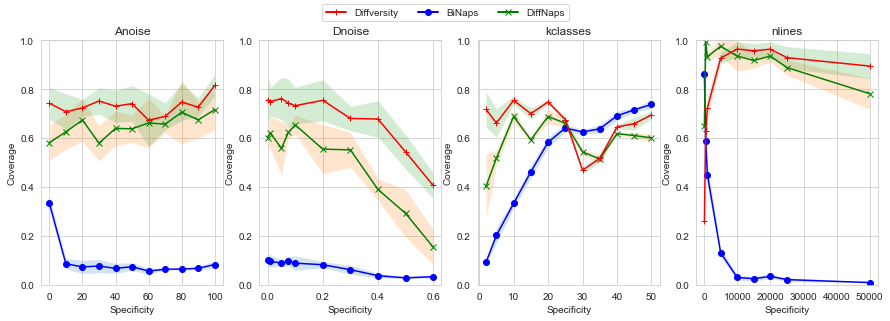

In [19]:
# Create a figure and axes with as many subplots as there are unique 'db' values
fig, axs = plt.subplots(1, len(grouped_db), figsize=(15, 4.5),)
marker = {'diffversify':'+-r', 'BiNaps':'o-b', 'DiffNaps':'x-g'}
# Iterate over each unique 'db' and plot all methods on the same plot
for ax, (db, group_db) in zip(axs, grouped_db):
    # Group the data by 'method' within the current 'db' group
    grouped_method = group_db.groupby('method')
    
    # Plot each method within the current 'db' group
    for method, group_method in grouped_method:
        ax.plot(group_method['x'], group_method['mean'],  marker[method], label=method)
        ax.fill_between(group_method['x'], group_method['mean'] - group_method['std'], group_method['mean'] + group_method['std'], alpha=0.2)

        if method not in methods:
            methods.append(method)
    
    # Add labels and title
    ax.set_xlabel('Specificity')
    ax.set_ylabel('Coverage')
    ax.set_title(f'{db}')
    ax.grid(True)
    ax.set_ylim(0, 1)

# lines = [Line2D([0], [0], color=plt.cm.viridis(i/len(methods)), lw=2) for i in range(len(methods))]
# fig.legend(lines, methods)
line1 = [Line2D([0], [0], marker=marker[m][0], color=marker[m][2], lw=2) for m in marker.keys()]

# plt.legend(handles=[scatter, line1, line2], loc='upper right', title='My Legend', fontsize='small')

fig.legend(line1, methods, loc='upper center', ncol=6, fancybox=True)#, bbox_to_anchor=(0.5, 1.05))
# Show plot
# plt.subplots_adjust(top=1.5)
# fig.tight_layout()
file = os.path.join(root, 'xpS_F1.jpeg')
# fig.savefig(file, dpi=1000)
# plt.savefig(file[:-9]+'.svg')
plt.savefig(file[:-4]+'.eps', dpi=1000)

# plt.show()